In [2]:
# Imports 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
# Load Dataset
df = pd.read_csv('airlines_flights_data.csv')

print(f'Dataset Shape: {df.shape}')

Dataset Shape: (300153, 12)


In [4]:
# Analyze Dataset
df.info()
df.head()

missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)
# there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
Missing Values in Each Column:
index               0
airline             0
flight              0
source_city         0
departure_time      0
stops        

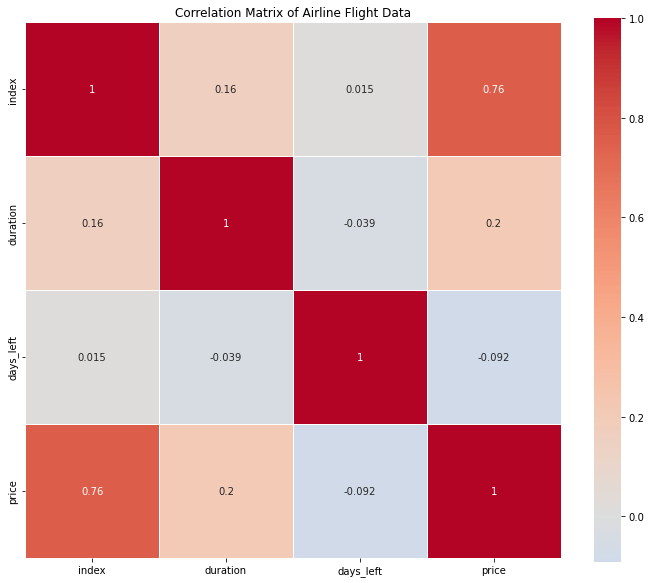

In [ ]:
#Exploratory Analysis
# correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center = 0, square =True, linewidths =0.5)
plt.title('Correlation Matrix of Airline Flight Data')
plt.show()

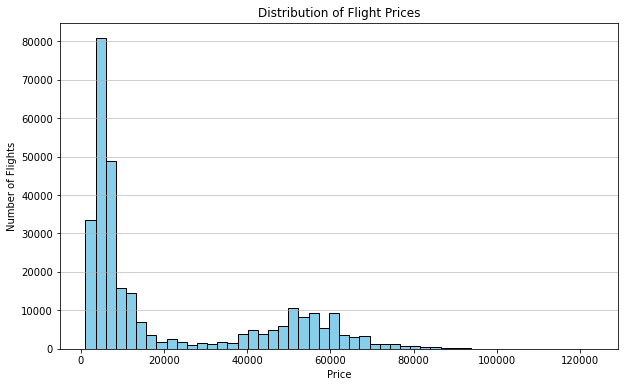

In [6]:

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Number of Flights')
plt.grid(axis='y', alpha=0.75)
plt.show()

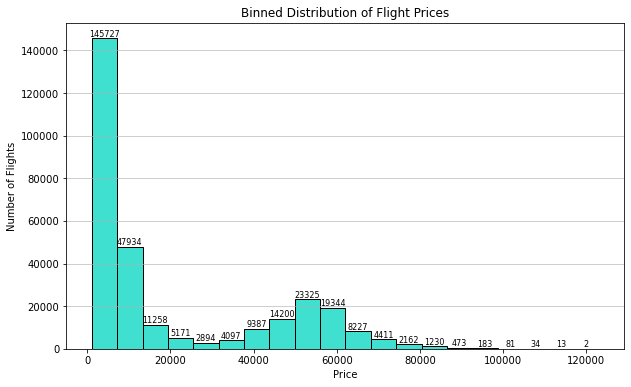

In [7]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['price'], bins=20, color='turquoise', edgecolor='black')
plt.title('Binned Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Number of Flights')
plt.grid(axis='y', alpha=0.75)

# Add labels on top of each bin
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text((bin_left + bin_right) / 2, count, int(count), ha='center', va='bottom', fontsize=8)

plt.show()

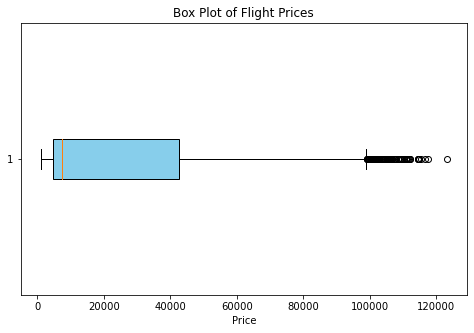

In [8]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Flight Prices')
plt.xlabel('Price')
plt.show()

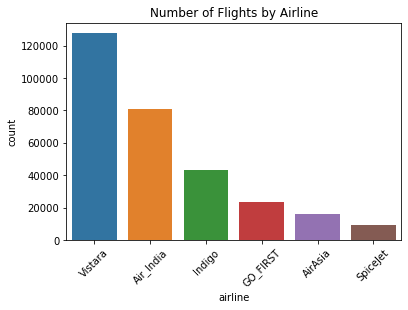

In [20]:
sns.countplot(x='airline', data=df, order=df['airline'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Flights by Airline')
plt.show()

In [9]:

# creating route feature for one-hot encoding
df['route'] = df['source_city'] + '_' + df['destination_city']

# Processing Data - dropping columns that are not needed for analysis
df.drop(columns=['index', 'flight','source_city','destination_city'], inplace=True)

In [10]:
# df nunqunieue values
df.nunique()

airline               6
departure_time        6
stops                 3
arrival_time          6
class                 2
duration            476
days_left            49
price             12157
route                30
dtype: int64

In [11]:
#One hot encoding for categorical variables - Airline, Route, departure_time, arrival_time
df_encoded = pd.get_dummies(df, columns = ['airline','route','stops','class','departure_time','arrival_time'], prefix=['airline','route','stops','class','departure_time','arrival_time'], drop_first = True)
df_encoded

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,route_Bangalore_Delhi,route_Bangalore_Hyderabad,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,2.17,1,5953,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2.33,1,5953,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2.17,1,5956,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2.25,1,5955,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.33,1,5955,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
300149,10.42,49,77105,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,13.83,49,79099,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
300151,10.00,49,81585,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [12]:
# Training and Testing Data Preparation
x = df_encoded.drop(columns=['price'])
y = df_encoded['price']

print(f'Features shape: {x.shape}')
print(f'Target shape: {y.shape}')


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# take a look at the shapes of the training and testing sets
print(f'----------------------------------')
print(f'Training set shape {x_train.shape}')
print(f'Test set shape {x_test.shape}')
print(f'Training target set shape {y_train.shape}')
print(f'Testing target set shape {y_test.shape}')

Features shape: (300153, 49)
Target shape: (300153,)
----------------------------------
Training set shape (240122, 49)
Test set shape (60031, 49)
Training target set shape (240122,)
Testing target set shape (60031,)


In [13]:
# Scaling the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
# multi-linear regression model
multiple_regression_model = LinearRegression()

multiple_regression_model.fit(x_train_scaled, y_train)

# Predicting on the test set
y_pred_train = multiple_regression_model.predict(x_train_scaled)
y_pred_test = multiple_regression_model.predict(x_test_scaled)


# calculate metrics for training and testing sets

def calculate_metrics(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  print(f"Mean Squared Error (MSE): {mse:.4f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
  print(f"Mean Absolute Error (MAE): {mae:.4f}") 
  print(f"R-squared (R²) Score: {r2:.4f}")


calculate_metrics(y_train, y_pred_train)

Mean Squared Error (MSE): 45154392.4547
Root Mean Squared Error (RMSE): 6719.7018
Mean Absolute Error (MAE): 4572.6051
R-squared (R²) Score: 0.9123


In [15]:
# Random Forest Regression Model

# Initialize the model
random_forest_model = RandomForestRegressor(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Let trees grow freely
    random_state=42         # Ensures reproducibility
)

# Train on scaled data (if used previously)
random_forest_model.fit(x_train_scaled, y_train)

# Predict on both sets
y_pred_train_rf = random_forest_model.predict(x_train_scaled)
y_pred_test_rf = random_forest_model.predict(x_test_scaled)

# Evaluate results
# calculate_metrics(y_train, y_pred_train_rf)
calculate_metrics(y_test, y_pred_test_rf)


Mean Squared Error (MSE): 7971650.0767
Root Mean Squared Error (RMSE): 2823.4111
Mean Absolute Error (MAE): 1104.4406
R-squared (R²) Score: 0.9845


In [18]:
# Lasso Model
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Use scaled features for Lasso as with other models
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled, y_train)

# Step 4: Best model
best_lasso = grid_search.best_estimator_
y_pred_ls = best_lasso.predict(x_test_scaled)

calculate_metrics(y_test, y_pred_ls)

Mean Squared Error (MSE): 45263668.1826
Root Mean Squared Error (RMSE): 6727.8279
Mean Absolute Error (MAE): 4549.4991
R-squared (R²) Score: 0.9122


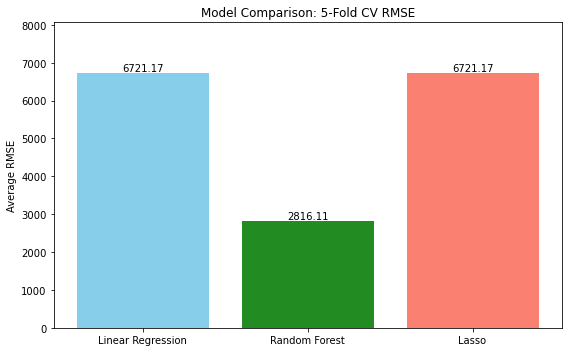

In [17]:
# 5-fold cross-validation for all models

# Calculate RMSE scores
lr_scores = cross_val_score(LinearRegression(), x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lr_rmse = np.sqrt(-lr_scores).mean()

rf_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-rf_scores).mean()

lasso = Lasso(alpha=grid_search.best_params_['alpha'], max_iter=10000)
lasso_scores = cross_val_score(lasso, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(-lasso_scores).mean()

# Prepare data for plotting
models = ['Linear Regression', 'Random Forest', 'Lasso']
rmse_values = [lr_rmse, rf_rmse, lasso_rmse]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, rmse_values, color=['skyblue', 'forestgreen', 'salmon'])
plt.ylabel('Average RMSE')
plt.title('Model Comparison: 5-Fold CV RMSE')
plt.ylim(0, max(rmse_values) * 1.2)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
